### Importing the necessary libraries for the analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [4]:
#Load the dataset
df = pd.read_csv('Airline_Delay_Cause 1.csv')

In [7]:
print(df.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


### What does the data look like?

In [6]:
# Display the first 5 rows of the DataFrame
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [10]:
# Display the shape of the DataFrame
print("Shape:", df.shape)

Shape: (218718, 21)


### The data has 21 features, with 218,718 rows

In [11]:
# Display the data types of the columns
print("Data types:\n", df.dtypes)

Data types:
 year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object


In [12]:
# Display the summary statistics of the numerical columns
print("\nSummary statistics:\n", df.describe())


Summary statistics:
                 year          month    arr_flights      arr_del15  \
count  218718.000000  218718.000000  218431.000000  218223.000000   
mean     2017.413295       6.540811     370.419414      67.678100   
std         3.811521       3.472842    1002.343590     180.650251   
min      2010.000000       1.000000       1.000000       0.000000   
25%      2014.000000       4.000000      53.000000       7.000000   
50%      2018.000000       7.000000     108.000000      18.000000   
75%      2021.000000      10.000000     260.000000      49.000000   
max      2023.000000      12.000000   21977.000000    5268.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  218431.000000  218431.000000  218431.000000  218431.000000   
mean       20.852381       2.213320      19.921873       0.157352   
std        49.050925       7.180529      62.828156       0.711092   
min         0.000000       0.000000       0.000000       0.000000   
25%        

In [13]:
# Create a new column for the average delay time
df['avg_delay'] = df['arr_delay'] / df['arr_flights']
print(df.head(5))

   year  month carrier       carrier_name airport  \
0  2023     12      9E  Endeavor Air Inc.     ABE   
1  2023     12      9E  Endeavor Air Inc.     AEX   
2  2023     12      9E  Endeavor Air Inc.     AGS   
3  2023     12      9E  Endeavor Air Inc.     ALB   
4  2023     12      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         72.0        5.0   
1           Alexandria, LA: Alexandria International         62.0        7.0   
2        Augusta, GA: Augusta Regional at Bush Field         95.0       10.0   
3                   Albany, NY: Albany International         23.0        2.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2111.0      256.0   

   carrier_ct  weather_ct  ...  late_aircraft_ct  arr_cancelled  arr_diverted  \
0        2.46        1.00  ...              0.81            0.0           0.0   
1        4.25        0.00  ...        

In [14]:
# Check for missing values in the DataFrame
print("Missing values:\n", df.isnull().sum())

Missing values:
 year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            287
arr_del15              495
carrier_ct             287
weather_ct             287
nas_ct                 287
security_ct            287
late_aircraft_ct       287
arr_cancelled          287
arr_diverted           287
arr_delay              287
carrier_delay          287
weather_delay          287
nas_delay              287
security_delay         287
late_aircraft_delay    287
avg_delay              287
dtype: int64


In [15]:
# Drop rows with missing values (optional, you may choose to handle missing values differently)
df.dropna(inplace=True)
print(df.head(5))

   year  month carrier       carrier_name airport  \
0  2023     12      9E  Endeavor Air Inc.     ABE   
1  2023     12      9E  Endeavor Air Inc.     AEX   
2  2023     12      9E  Endeavor Air Inc.     AGS   
3  2023     12      9E  Endeavor Air Inc.     ALB   
4  2023     12      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         72.0        5.0   
1           Alexandria, LA: Alexandria International         62.0        7.0   
2        Augusta, GA: Augusta Regional at Bush Field         95.0       10.0   
3                   Albany, NY: Albany International         23.0        2.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2111.0      256.0   

   carrier_ct  weather_ct  ...  late_aircraft_ct  arr_cancelled  arr_diverted  \
0        2.46        1.00  ...              0.81            0.0           0.0   
1        4.25        0.00  ...        

In [16]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
avg_delay              0
dtype: int64


In [17]:
# Group the data by airport code and sum the number of flights arrived
airport_arrivals = df.groupby('airport')['arr_flights'].sum()

# Sort the airports by the number of arrivals in descending order
busiest_airports = airport_arrivals.sort_values(ascending=False)

# Get the top 10 busiest airports
top_10_busiest_airports = busiest_airports.head(10)

print(top_10_busiest_airports)

airport
ATL    4724560.0
ORD    3689424.0
DFW    3409150.0
DEN    3119259.0
LAX    2662276.0
PHX    2171818.0
CLT    2098862.0
SFO    1973734.0
IAH    1972352.0
LAS    1969951.0
Name: arr_flights, dtype: float64


In [18]:
# Grouping by airport and year and summing delayed flights
delayed_flights_by_airport_year = df.groupby(['airport_name', 'year'])['arr_del15'].sum().reset_index()

In [19]:
1. # Bar Plot of Total Arriving Flights by Carrier
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
flights_per_carrier = df.groupby('carrier_name')['arr_flights'].sum().sort_values(ascending=False)
total_flights_by_carrier.plot(kind='bar')
plt.title('Total Flights Arriving Carrier Wise')
plt.xlabel('Carrier Name')
plt.ylabel('Total Number of Arriving Flights')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

# These are just a few examples of data visualization codes. Depending on your specific analysis goals, you can customize and combine these visualizations or explore other types of plots such as heatmaps, line plots, or geographical maps.

NameError: name 'total_flights_by_carrier' is not defined

<Figure size 1200x800 with 0 Axes>

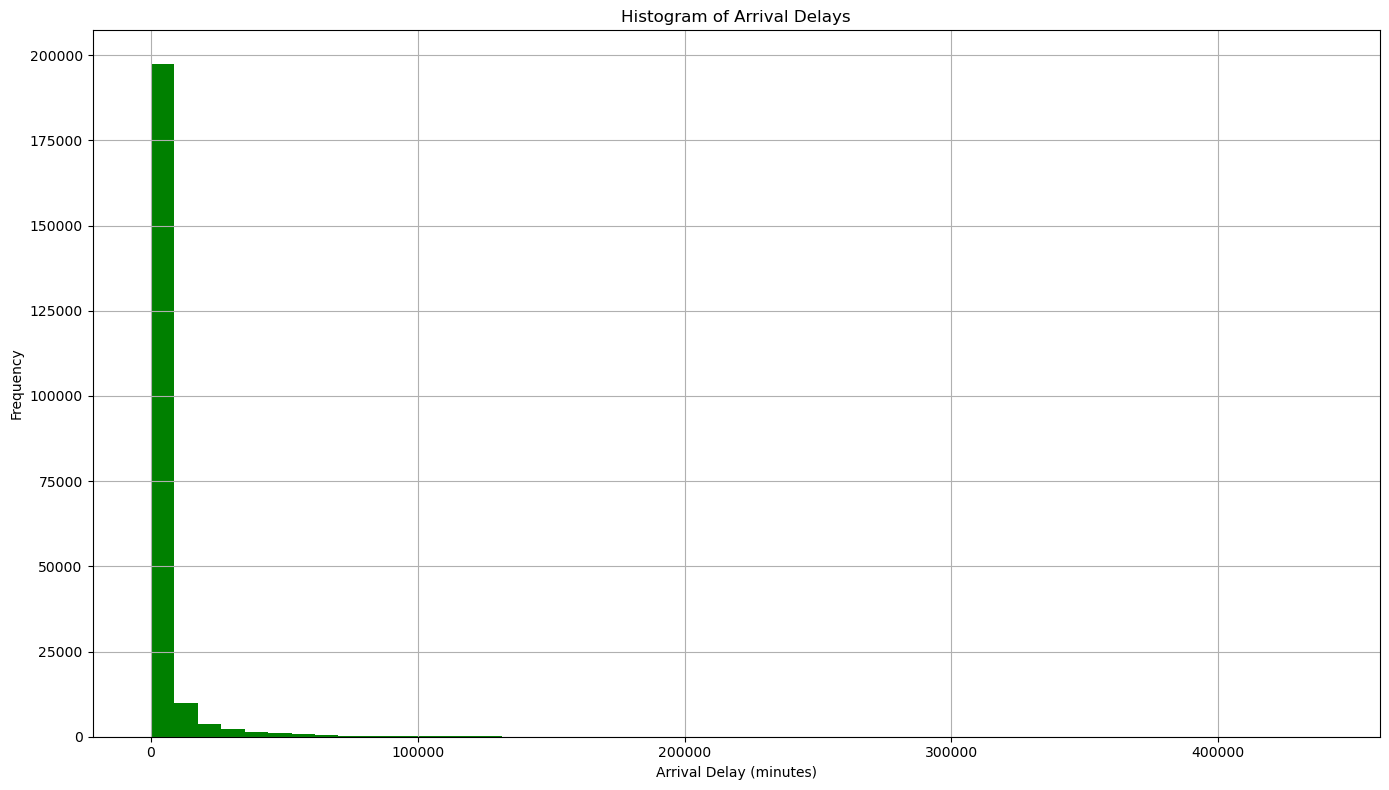

In [20]:
# Histogram of Arrival Delays:
plt.figure(figsize=(14, 8))
plt.hist(df['arr_delay'], bins=50, color='green')
plt.title('Histogram of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

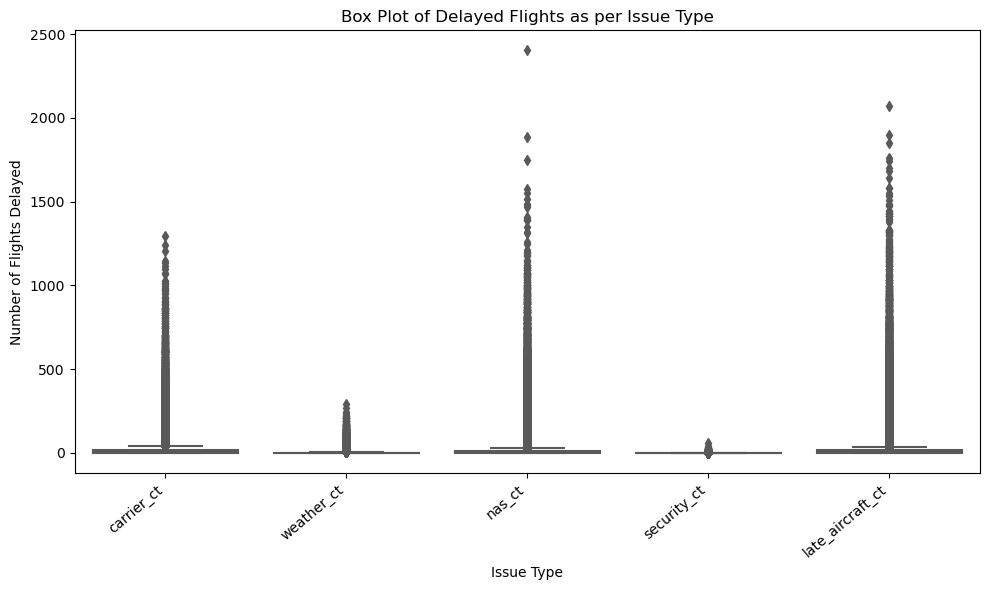

In [21]:
# Box Plot of Delayed Flights by Type of Issue:
import seaborn as sns
delay_types = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
delay_data = df[delay_types]

plt.figure(figsize=(10, 6))
sns.boxplot(data=delay_data, palette='Set2')
plt.title('Box Plot of Delayed Flights as per Issue Type')
plt.xlabel('Issue Type')
plt.ylabel('Number of Flights Delayed')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

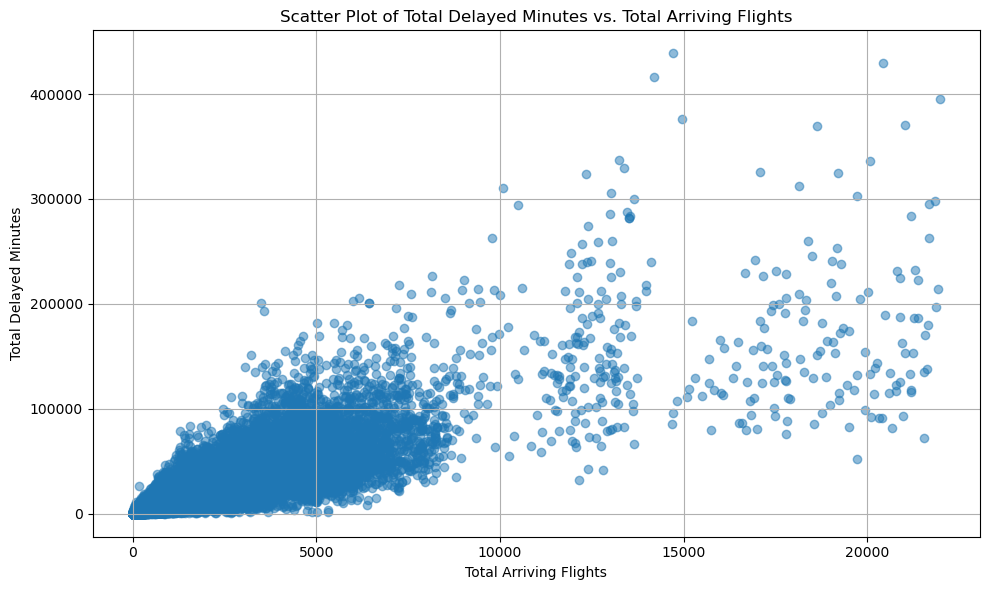

In [22]:
# Scatter Plot of Total Delayed Minutes vs. Total Arriving Flights:
plt.figure(figsize=(10, 6))
plt.scatter(df['arr_flights'], df['arr_delay'], alpha=0.5)
plt.title('Scatter Plot of Total Delayed Minutes vs. Total Arriving Flights')
plt.xlabel('Total Arriving Flights')
plt.ylabel('Total Delayed Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()

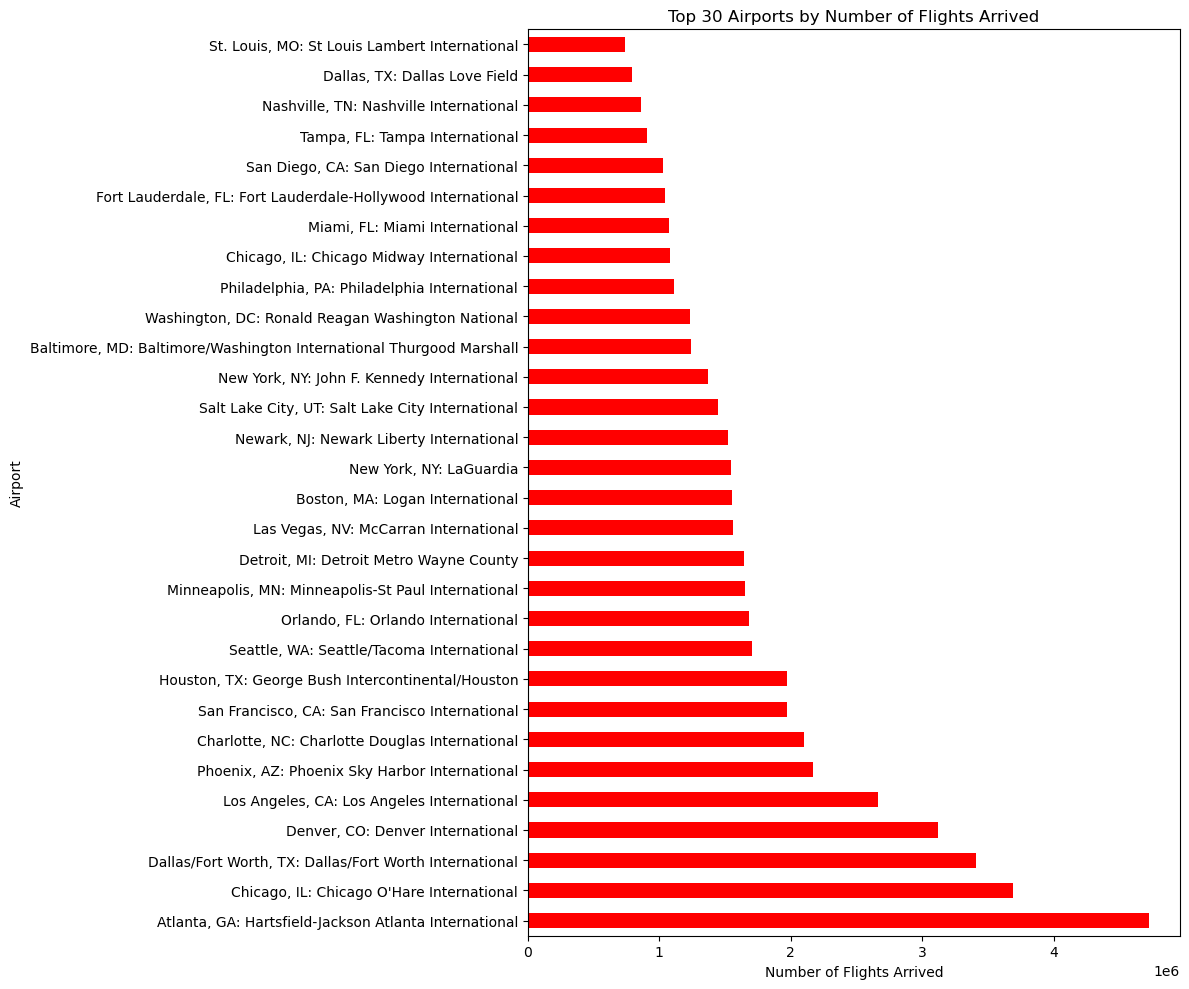

In [23]:
#Top 30 busy airports by number of flights arriving
import matplotlib.pyplot as plt

# Sort the airports by the number of flights arrived
top_30_airports = df.groupby('airport_name')['arr_flights'].sum().nlargest(30)

# Plotting
plt.figure(figsize=(12, 10))
top_30_airports.sort_values().plot(kind='barh', color='red')
plt.xlabel('Number of Flights Arrived')
plt.ylabel('Airport')
plt.title('Top 30 Airports by Number of Flights Arrived')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


In [24]:
# Group the data by airport and sum the number of delayed flights for each airport
delayed_flights_by_airport = df.groupby('airport_name')['arr_del15'].sum()

In [25]:
# Sort airports based on the total number of delayed flights and select the top 5
top_5_airports = delayed_flights_by_airport.nlargest(5)

In [26]:
# Get delayed reasons columns
delay_reasons = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

In [27]:
# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Airport', 'Total Delayed Flights'] + delay_reasons)

In [28]:
# Iterate over the top 5 airports
for airport in top_5_airports.index:
    # Get the total number of delayed flights for the airport
    total_delayed_flights = delayed_flights_by_airport.loc[airport]
    
    # Get delayed reasons for the airport
    delayed_reasons_data = df[df['airport_name'] == airport][delay_reasons].sum()
    
    # Calculate the percentage of delayed flights for each reason
    percentages = (delayed_reasons_data / total_delayed_flights) * 100

In [29]:
import matplotlib.pyplot as plt
# Calculate the number of rows and columns for the grid layout
num_rows = (len(result_df) + 1) // 2  # Add 1 to ensure we round up
num_cols = 2
# Initialize subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))
# Flatten the axes array to iterate over them
axes = axes.flatten()

# Plot pie chart for each airport
for i, row in enumerate(result_df.iterrows()):
    airport = row[1]['Airport']
    airport_name = ' '.join(airport.split()[:3])  # Extract the first three words
    data = row[1][delay_reasons].values
    labels = delay_reasons
    
    ax = axes[i]
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
    ax.set_title(f'Delay Reasons Distribution for {airport_name}')


# Hide any remaining empty subplots
for i in range(len(result_df), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1200x0 with 0 Axes>

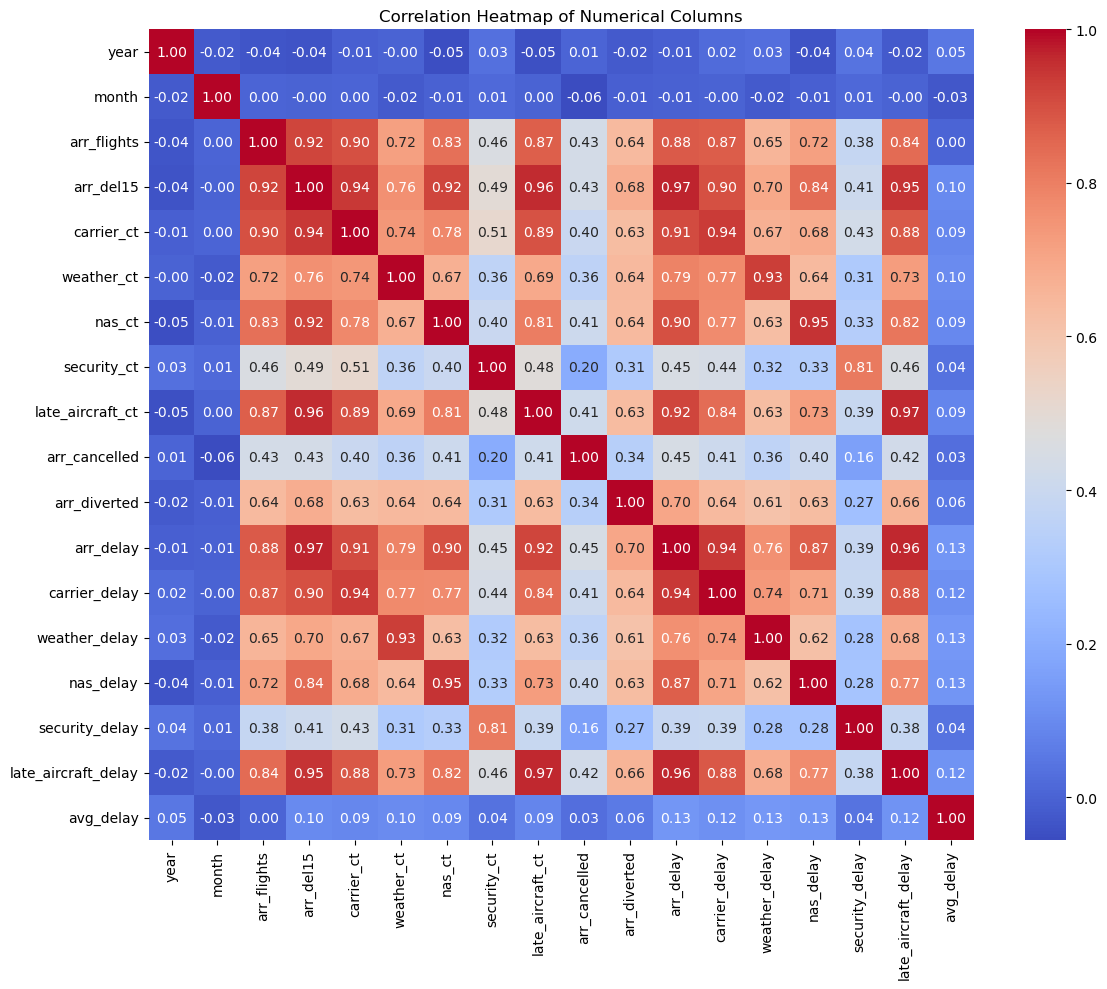

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.show()

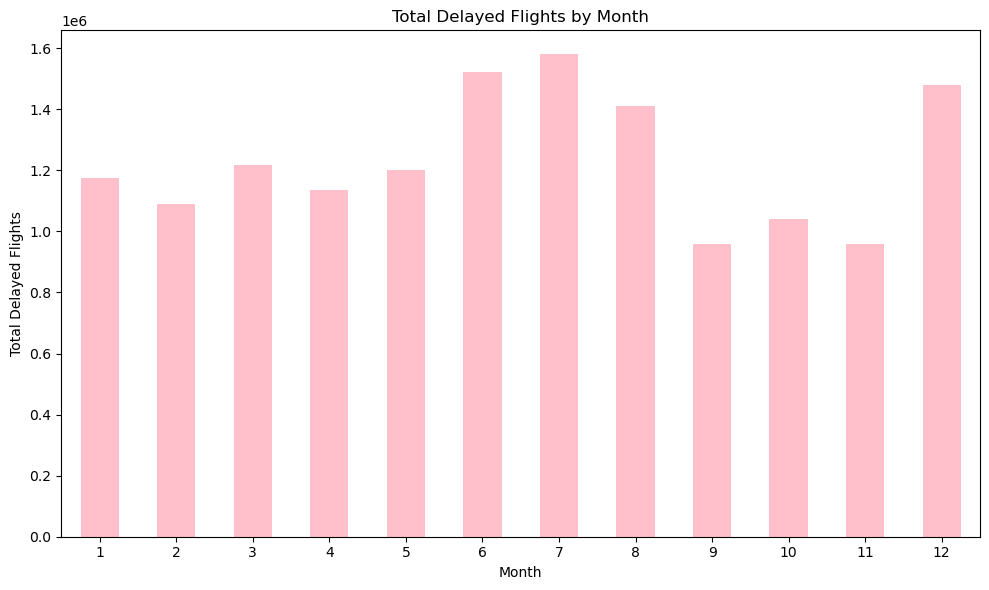

In [31]:
# To visualize in which season or month the flights are delayed the most
import matplotlib.pyplot as plt

# Group by month and sum the number of delayed flights
delayed_flights_by_month = df.groupby('month')['arr_del15'].sum()

# Plotting
plt.figure(figsize=(10, 6))
delayed_flights_by_month.plot(kind='bar', color='pink')
plt.title('Total Delayed Flights by Month')
plt.xlabel('Month')
plt.ylabel('Total Delayed Flights')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

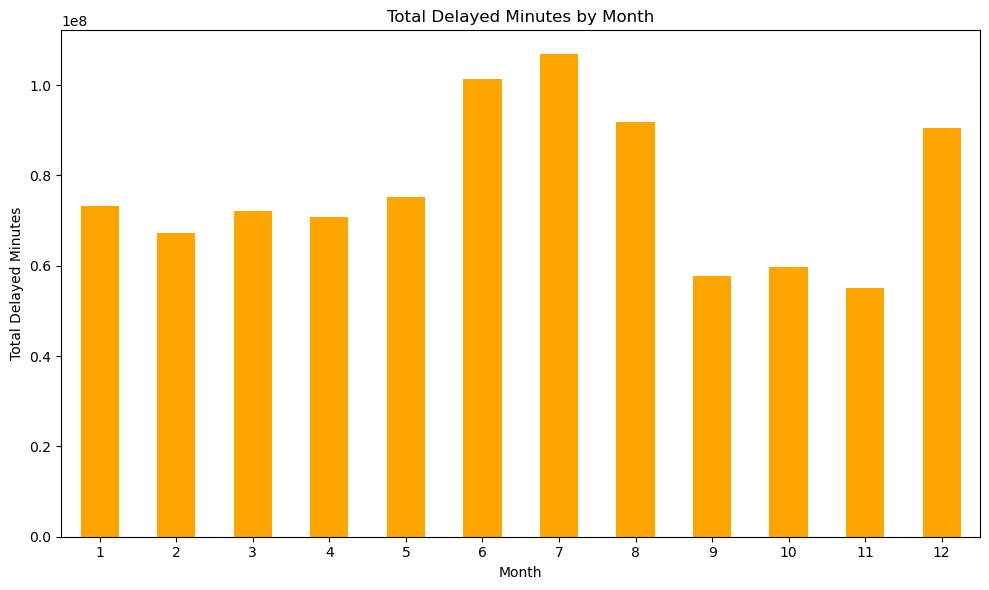

In [32]:
#Visualize in which season or month the flights are delayed the most in terms of total delayed minutes
import matplotlib.pyplot as plt

# Group by month and sum the total delayed minutes
delayed_minutes_by_month = df.groupby('month')['arr_delay'].sum()

# Plotting
plt.figure(figsize=(10, 6))
delayed_minutes_by_month.plot(kind='bar', color='orange')
plt.title('Total Delayed Minutes by Month')
plt.xlabel('Month')
plt.ylabel('Total Delayed Minutes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
#Getting teh dataset ready for making predictions by machine learning models
# Import additional libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [34]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,avg_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0,9.333333
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,5.612903
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,9.042105
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,3.260870
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0,10.148745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218713,2010,12,YV,Mesa Airlines Inc.,STL,"St. Louis, MO: St Louis Lambert International",56.0,16.0,4.55,0.48,...,3.94,0.0,0.0,831.0,320.0,12.0,198.0,0.0,301.0,14.839286
218714,2010,12,YV,Mesa Airlines Inc.,SYR,"Syracuse, NY: Syracuse Hancock International",102.0,27.0,8.38,0.21,...,10.45,4.0,0.0,1663.0,406.0,21.0,344.0,0.0,892.0,16.303922
218715,2010,12,YV,Mesa Airlines Inc.,TEX,"Telluride, CO: Telluride Regional",27.0,3.0,1.68,0.00,...,0.00,4.0,3.0,110.0,69.0,0.0,41.0,0.0,0.0,4.074074
218716,2010,12,YV,Mesa Airlines Inc.,TUS,"Tucson, AZ: Tucson International",266.0,27.0,11.47,0.00,...,10.62,1.0,0.0,1302.0,732.0,0.0,114.0,0.0,456.0,4.894737


In [35]:
# Select predictors (independent variables)
predictors = ['arr_flights','nas_ct','security_ct','arr_diverted','carrier_delay','weather_delay','nas_delay','security_delay','carrier_ct', 'weather_ct']

In [36]:
# Define the target variable
target = 'avg_delay'

In [37]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[target], test_size=0.2, random_state=21)

In [38]:
# Initialize the linear regression model
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
# Predict on the test set
y_pred = model.predict(X_test)

In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error (MAPE)
r2 = r2_score(y_test, y_pred)

In [42]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R-squared Score:", r2)

Mean Squared Error: 75.98375568311775
Root Mean Squared Error: 8.71686616182202
Mean Absolute Error: 5.851806556420924
Mean Absolute Percentage Error: inf
R-squared Score: 0.08536411186937087


In [43]:
#OLS regression
import statsmodels.api as sm

# Fit OLS regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# View model summary
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:              avg_delay   R-squared (uncentered):                   0.152
Model:                            OLS   Adj. R-squared (uncentered):              0.152
Method:                 Least Squares   F-statistic:                              3135.
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                        0.00
Time:                        03:40:54   Log-Likelihood:                     -7.0490e+05
No. Observations:              174578   AIC:                                  1.410e+06
Df Residuals:                  174568   BIC:                                  1.410e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [48]:
# for DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the decision tree regressor
tree_regressor = DecisionTreeRegressor(random_state=21)

# Fit the decision tree regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_regressor.predict(X_test)

# Evaluate the decision tree regressor
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Metrics:")
print("Mean Squared Error:", mse_tree)
print("Root Mean Squared Error:", rmse_tree)
print("R-squared Score:", r2_tree)

Decision Tree Regression Metrics:
Mean Squared Error: 33.38960047154163
Root Mean Squared Error: 5.778373514367311
R-squared Score: 0.5980808449509079


In [49]:
# Apply RandomTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the random forest regressor
forest_regressor = RandomForestRegressor(random_state=21)

# Fit the random forest regressor to the training data
forest_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = forest_regressor.predict(X_test)

# Evaluate the random forest regressor
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Regression Metrics:")
print("Mean Squared Error:", mse_forest)
print("Root Mean Squared Error:", rmse_forest)
print("R-squared Score:", r2_forest)

Random Forest Regression Metrics:
Mean Squared Error: 17.77685287369124
Root Mean Squared Error: 4.216260531998851
R-squared Score: 0.7860154783069159


In [50]:
#For AdaBoostRegression Model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the AdaBoost regressor with DecisionTreeRegressor as the base estimator
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=21)

# Fit the AdaBoost regressor to the training data
ada_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_regressor.predict(X_test)

# Evaluate the AdaBoost regressor
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print("AdaBoost Regression Metrics:")
print("Mean Squared Error:", mse_ada)
print("Root Mean Squared Error:", rmse_ada)
print("R-squared Score:", r2_ada)

/Users/ashima/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Regression Metrics:
Mean Squared Error: 24.264305729311584
Root Mean Squared Error: 4.9258812134796335
R-squared Score: 0.7079243501314202


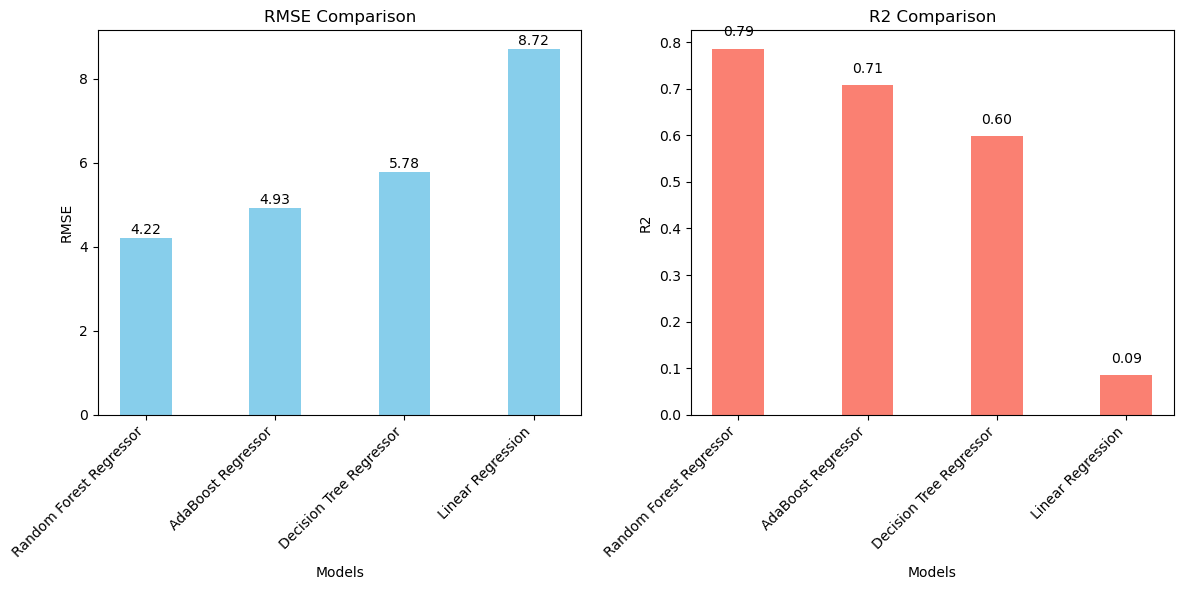

In [54]:
#Model Comparison
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "AdaBoost Regressor"]

rmse_scores = [rmse, rmse_tree, rmse_forest, rmse_ada]
r2_scores = [r2, r2_tree, r2_forest, r2_ada]

# Sorting models based on RMSE scores
sorted_models_rmse = [x for _, x in sorted(zip(rmse_scores, models))]
sorted_rmse_scores = sorted(rmse_scores)

# Sorting models based on R2 scores
sorted_models_r2 = [x for _, x in sorted(zip(r2_scores, models), reverse=True)]
sorted_r2_scores = sorted(r2_scores, reverse=True)

# Plotting
bar_width = 0.4
x = np.arange(len(models))

plt.figure(figsize=(12, 6))

# RMSE comparison
plt.subplot(1, 2, 1)
plt.bar(x, sorted_rmse_scores, bar_width, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.xticks(x, sorted_models_rmse, rotation=45, ha="right")
for i, v in enumerate(sorted_rmse_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

# R2 comparison
plt.subplot(1, 2, 2)
plt.bar(x, sorted_r2_scores, bar_width, color='salmon')
plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 Comparison')
plt.xticks(x, sorted_models_r2, rotation=45, ha="right")
for i, v in enumerate(sorted_r2_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#Hyper Parameter Tuning

In [ ]:
#Final selection of Model